## 安装sklearn包

Windows：打开控制台（按键盘上的win+R，调出运行框，输入`cmd`回车），接着输入`pip install sklearn`回车（如果网络不好，可以用 `pip install sklearn -i http://pypi.douban.com/simple/  --trusted-host pypi.douban.com` ）

macOS：打开terminal（按下command+空格，搜索框里面输入`terminal`回车），接着输入`pip3 install sklearn`回车（如果网络不好，可以用 `pip3 install sklearn -i http://pypi.douban.com/simple/  --trusted-host pypi.douban.com` ）

安装其他包同理，把`sklearn`换成对应包的名字（如`pandas`）

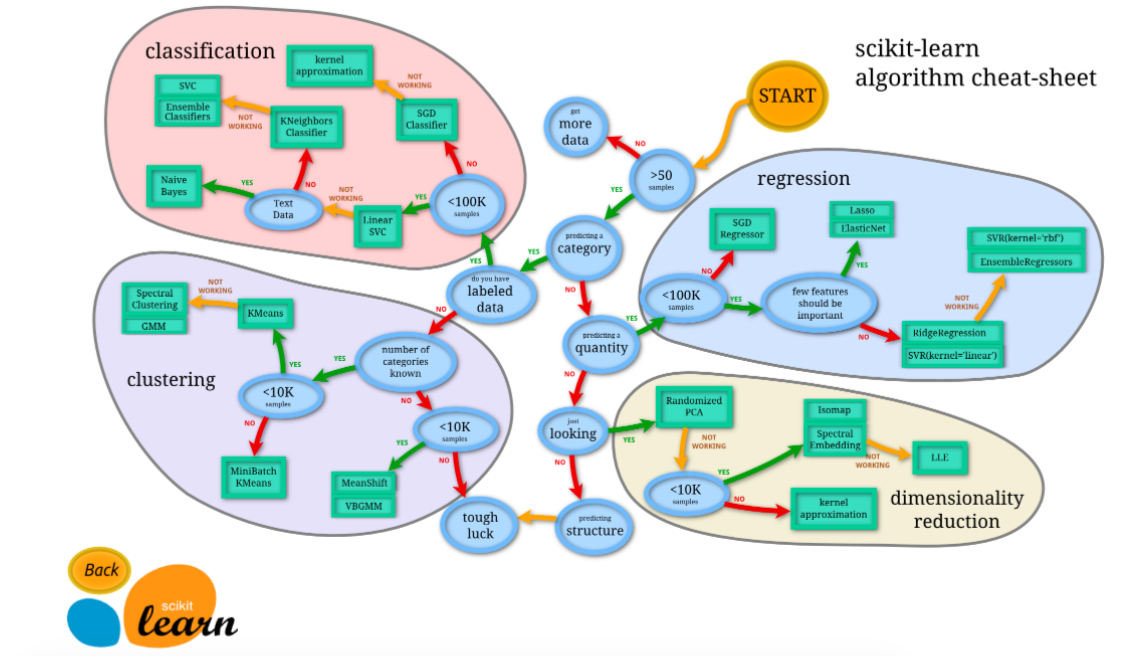

Sklearn官网的流程图，蓝色圆圈内是判断条件，绿色方框内是可以选择的算法：

从 START 开始，首先看数据的样本是否 >50，小于则需要收集更多的数据。

由图中，可以看到算法有四类，分类，回归，聚类，降维。

其中 分类和回归是监督式学习，即每个数据对应一个 label。 聚类 是非监督式学习，即没有 label。 另外一类是 降维，当数据集有很多很多属性的时候，可以通过 降维 算法把属性归纳起来。例如 20 个属性只变成 2 个，注意，这不是挑出 2 个，而是压缩成为 2 个，它们集合了 20 个属性的所有特征，相当于把重要的信息提取的更好，不重要的信息就不要了。

然后看问题属于哪一类问题，是分类还是回归，还是聚类，就选择相应的算法。 当然还要考虑数据的大小，例如 100K 是一个阈值。

可以发现有些方法是既可以作为分类，也可以作为回归，例如 SGD。

# sklearn用法

里面会有参数，比如：

``` python
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, 
                                       algorithm=’auto’,
                                       leaf_size=30, p=2, metric=’minkowski’, 
                                       metric_params=None, n_jobs=None, **kwargs)
```

用help就能看到。

In [1]:
import sklearn

sklearn.__version__

'1.0.2'

In [2]:
# 注意用的方法

import sklearn

help(sklearn.neighbors.KNeighborsClassifier)

AttributeError: module 'sklearn' has no attribute 'neighbors'

In [3]:
from sklearn.neighbors import KNeighborsClassifier

help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

要查找一个东西的用法时，直接在网上搜：sklearn+名字

### 例子

Iris的数据，这种花有四个属性，花瓣的长宽，茎的长宽，根据这些属性把花分为三类。

我们要用`分类器`去把这些花分开。

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris.target_names)

print(iris_X)
print(iris_y)

['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)  # 测试集占30%
print(y_train)

[2 1 1 0 2 1 2 0 0 1 0 0 2 0 0 2 0 0 1 2 2 1 0 1 1 2 1 2 0 1 1 1 1 0 1 2 2
 0 1 1 2 1 2 0 0 0 0 1 0 2 2 0 1 2 0 0 1 2 1 2 2 2 2 2 0 2 2 0 1 1 1 1 1 1
 2 2 0 2 1 0 0 0 1 0 0 0 0 2 2 1 2 0 2 0 0 2 2 0 1 1 1 1 2 1 1]


In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[2 2 1 1 0 1 1 1 0 1 0 0 2 0 0 2 2 0 0 2 0 2 0 1 0 2 1 0 1 0 2 2 2 1 2 0 1
 2 2 1 0 2 2 2 2]
[2 2 1 1 0 1 1 1 0 1 0 0 2 0 0 2 2 0 0 2 0 2 0 1 0 1 1 0 1 0 2 2 2 1 2 0 1
 2 2 1 0 2 2 2 1]


In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn.predict(X_test))

0.9555555555555556

### 波士顿房价

In [8]:
from sklearn import datasets
loaded_data = datasets.load_boston()

data_X = loaded_data.data
data_y = loaded_data.target
print(data_X.shape)
print(data_X[:5])
print(data_y[:5])

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


C:\Users\HenryFox\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [9]:
loaded_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

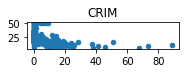

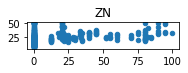

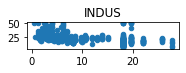

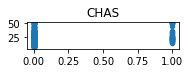

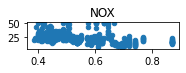

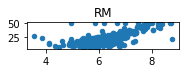

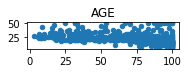

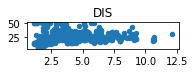

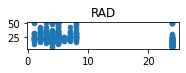

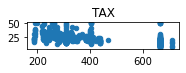

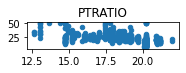

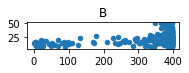

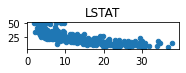

In [10]:
import matplotlib.pyplot as plt

for i in range(13):
    plt.subplot(7, 2, i+1)
    plt.scatter(data_X[:, i], data_y, s=20)
    plt.title(loaded_data.feature_names[i])
    plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [12]:
X_train.shape

(404, 13)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.predict(X_test)

array([19.29853876, 16.724436  , 15.55689395, 22.36056563, 19.69160908,
       40.40825674, 14.77534997, 36.76539913, 18.10418046, 15.8089132 ,
       12.77518429, 27.94523094, 23.45331278, 33.99031654, 18.76780278,
       24.20029715, 14.45764539, 15.09376784, 13.38994211, 33.42376118,
       20.83376389, 12.66381034, 16.14801068, 13.13532451,  9.97634093,
       39.11246841, 18.22751514, 21.86999812, 25.83152072, 17.67587596,
       19.33138723, 19.47670478, 25.15423914, 24.60089098, 17.00305068,
       19.22284846, 35.05278677, 23.93045886,  2.94669615, 26.58828317,
       16.28583463, 26.00279248,  8.41752488, 33.02766135, 31.89745673,
       15.07374535, 13.64830004, 23.03167925, 35.35767142, 21.07948365,
       21.85975919, 11.18689025, 19.25059108, 22.39653724, 20.71693802,
        1.108373  , 13.76763304, 14.39085464, 35.10493465, 13.99574066,
       10.89538276, 19.45807011, 17.2274166 , 38.20399638, 36.85146315,
       14.95477038, 17.91833414, 21.05654903, 12.82433742, 18.57

In [16]:
y_test

array([20.5, 20.6, 18.4, 20.6, 15.2, 48.8, 15.4, 50. , 18.9, 15.6, 15.6,
       28.7, 21. , 39.8, 19.6, 21.7, 13.4, 14.9, 12.3, 32. , 19.7,  9.5,
       20. , 13.4, 16.5, 50. , 14.1, 16.5, 22.2, 17.1, 19.4, 20.1, 28.7,
       24.7, 17.8, 18.3, 35.2, 21.4, 14.4, 23.9, 11.7, 23.3,  8.7, 31.7,
       27.9, 17.3,  8.3, 19.4, 35.1, 21.8, 16.1, 13.8, 18.6, 22.2, 21.7,
       17.9, 14.3, 18.2, 38.7, 14.8,  6.3, 14.6, 22.5, 45.4, 43.1, 18.9,
       15.1, 21.5, 13.4, 10.9, 18.5, 20.5, 22.9, 15.3, 28.4,  7.2, 32.7,
       21.6, 15.2, 12.1, 18.9, 12.5, 14.5, 24.4, 20.6, 19.3, 22.8, 14.4,
        8.5, 17.4, 13.1, 20.2, 15.6, 18.7, 13.1, 35.4, 13.5, 13.3, 19.5,
       22.2, 19.8, 22.9])